<a href="https://colab.research.google.com/github/lmlouis/IntroductionIA/blob/main/_cluster_ou_cluster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# hierachical clustering : **agglomerative clustering**


Pour mieux comprendre le comportement de nos clients, nous allons les classer en fonction de ces caractéristiques.


Customer ID

Age

Gender

Annual income (how much that individual earns)

Spending score (a number assigned to the customer based on how frequently he comes to the supermarket and how much he spends)


In [3]:
from google.colab import drive
drive.mount('/gdrive') 

Mounted at /gdrive


In [5]:
import pandas as pd

dataset = pd.read_csv("/gdrive/MyDrive/Gomycode /Introduction a IA /unsupervised learning /#1- Unsupervised Clustering/Mall_Customers.csv")
dataset.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


## Clustering Preprocessing

In [6]:
data =  dataset
data=data.drop("CustomerID", axis=1)
data["Gender"]=data["Gender"].map({"Male":1, "Female":0})  #convert Gender values into numerical
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## Agglomerative Clustering

### étape 1: **Distance Measurements**
Nous commençons le processus de clustering agglomératif en mesurant la distance entre les points de données. Comment la calculer exactement ? 

**Euclidean Distance.**

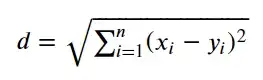

**distance_matrix** de **scipy.spatial** calculerait la distance entre les points de données en se basant sur la distance euclidienne, et je l'arrondis à 2 décimales.

In [9]:
import numpy as np
from scipy.spatial import distance_matrix


distanceDF = pd.DataFrame(np.round(distance_matrix(data.values, data.values), 2), index = data.index, columns = data.index)
distanceDF

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.00,42.05,33.05,38.24,12.25,37.19,36.81,55.24,57.77,35.03,...,90.70,93.88,103.74,112.56,111.08,113.50,114.54,117.11,124.47,130.16
1,42.05,0.00,75.02,4.69,42.26,5.57,76.36,13.53,89.16,13.38,...,106.20,89.50,122.79,99.97,126.20,105.95,125.33,111.76,137.75,122.35
2,33.05,75.02,0.00,71.06,35.75,70.04,15.13,88.07,44.22,66.82,...,89.74,108.08,97.89,130.22,107.91,127.95,114.93,129.88,122.19,143.77
3,38.24,4.69,71.06,0.00,37.87,1.73,72.03,17.12,84.66,9.11,...,102.99,87.83,119.46,99.15,122.93,104.71,122.41,110.41,134.92,121.35
4,12.25,42.26,35.75,37.87,0.00,37.11,34.25,54.60,49.63,32.08,...,87.72,90.76,101.22,108.93,106.96,110.21,110.55,114.19,122.01,127.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,113.50,105.95,127.95,104.71,110.21,103.86,125.43,103.79,129.69,101.37,...,58.53,19.95,71.38,14.21,64.13,0.00,52.32,8.43,63.40,18.19
196,114.54,125.33,114.93,122.41,110.55,121.30,110.67,128.47,111.52,116.66,...,25.98,48.77,26.72,64.71,13.56,52.32,0.00,47.81,19.77,58.07
197,117.11,111.76,129.88,110.41,114.19,109.48,127.66,110.21,132.34,107.04,...,55.99,23.56,67.28,22.25,60.22,8.43,47.81,0.00,57.07,14.35
198,124.47,137.75,122.19,134.92,122.01,133.66,119.65,141.49,123.18,129.79,...,34.44,61.30,26.02,77.08,22.78,63.40,19.77,57.07,0.00,65.03


## complete-linkage 
methods for determining the distance between two clusters.

1. **Single Linkage**: For two clusters R and S, the single linkage returns the minimum distance between two points i and j such that i belongs to R and j belongs to S.

image.png

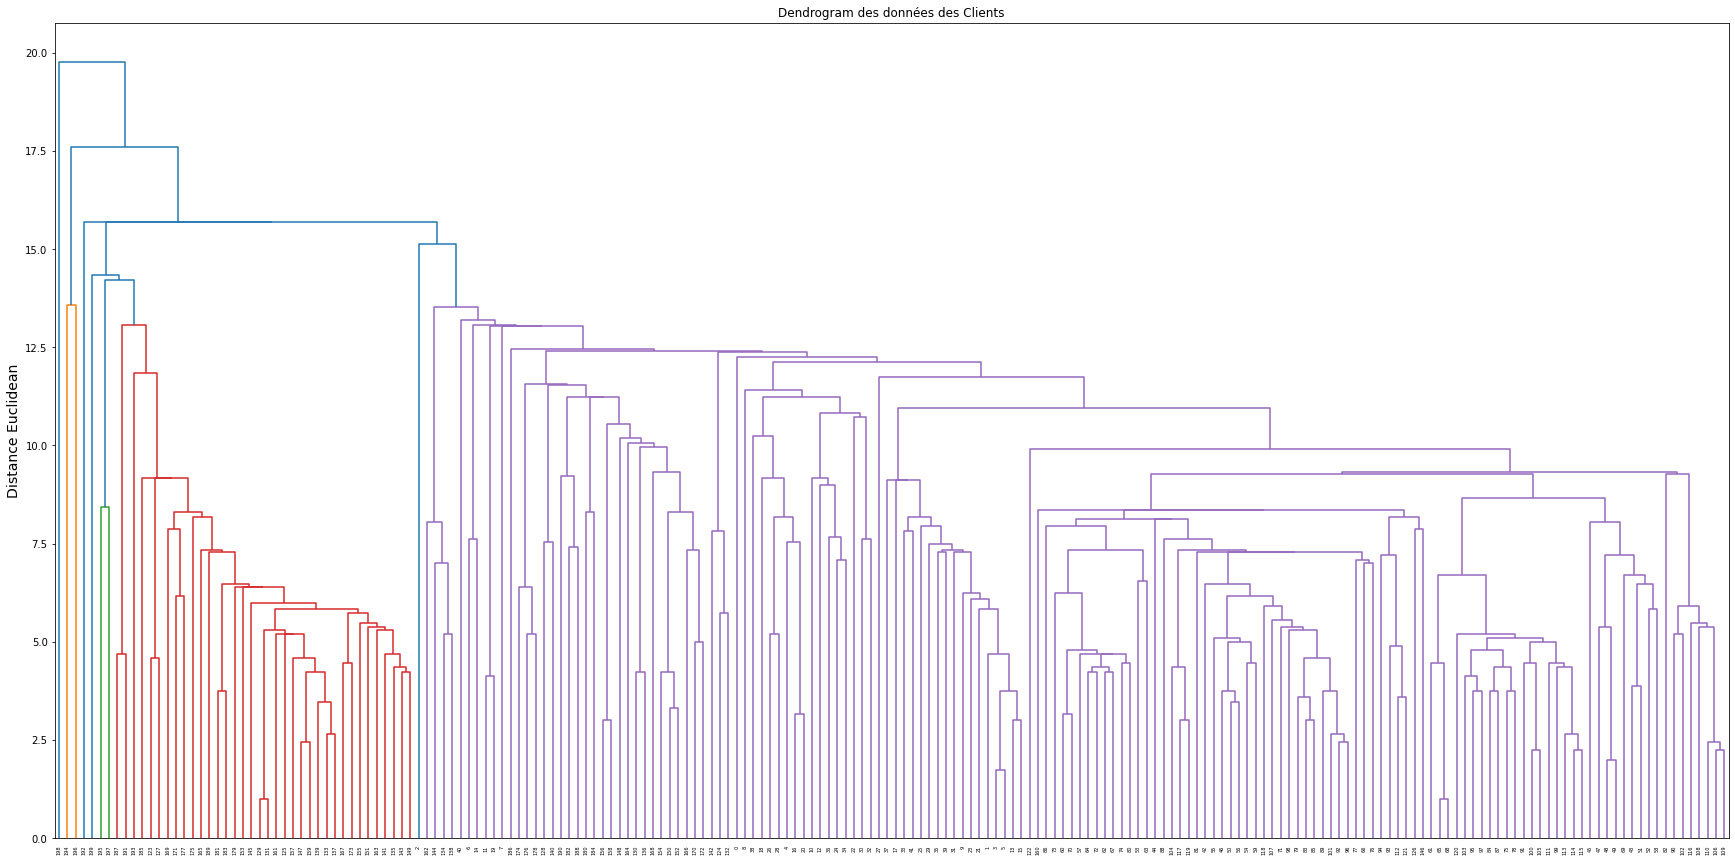

* importer **linkage** et **denrogram** de scipy
* création d'un dendrogramme basé sur les données avec **un seul linkage criterion** (critère de liaison)

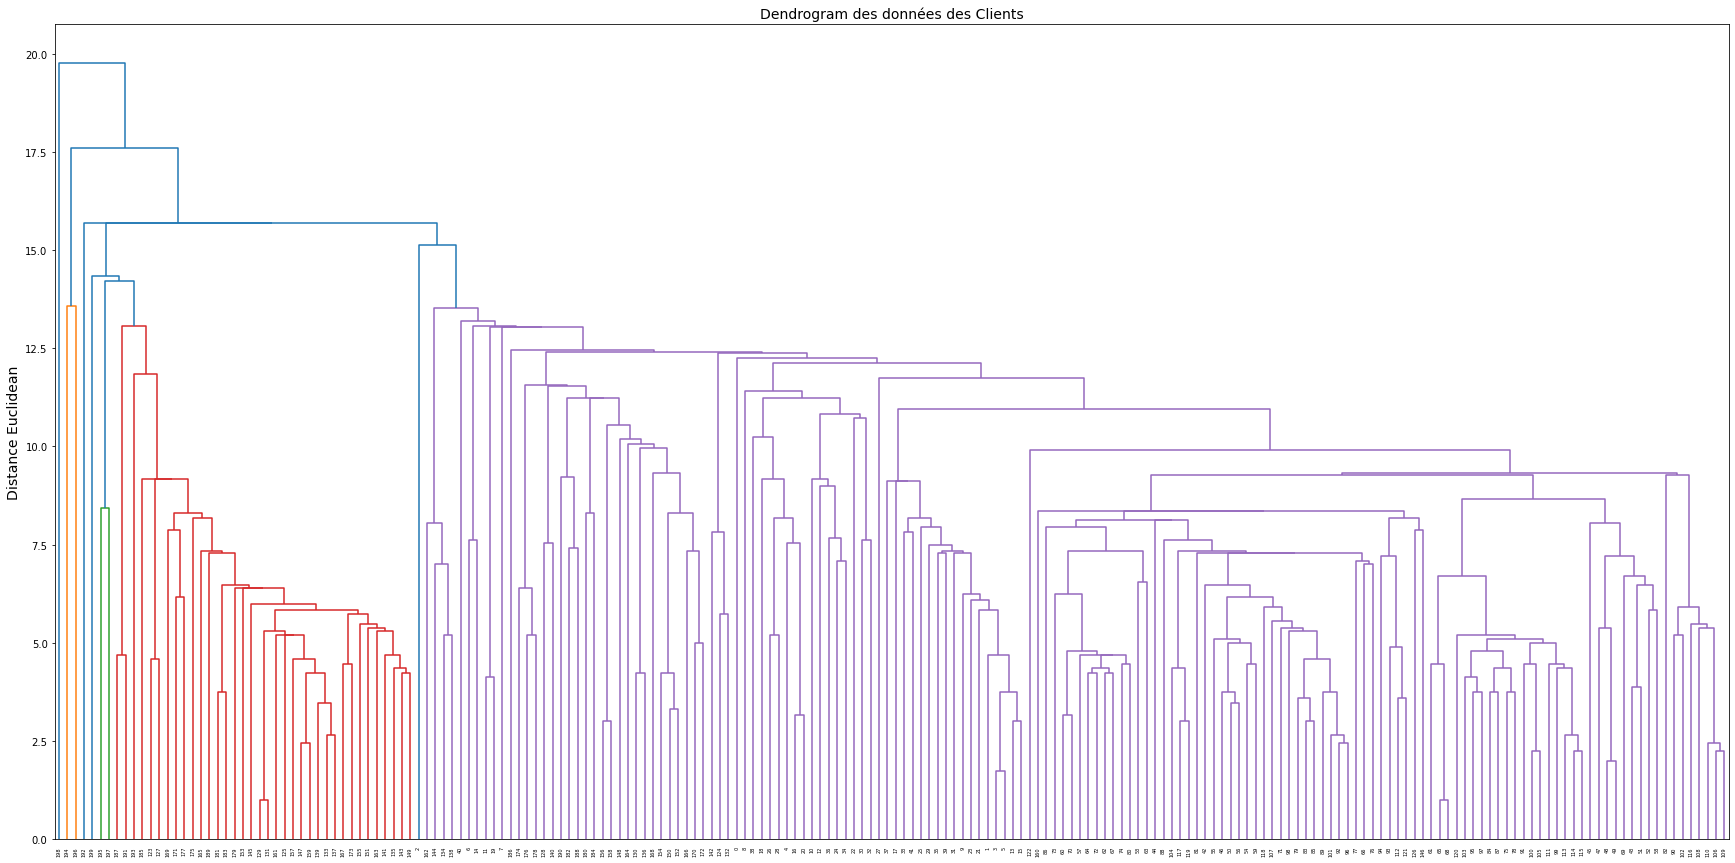

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(30,15))
denrogram_method = dendrogram(linkage(data, method='single'), 
                              labels = data.index)
plt.ylabel('Distance Euclidean', fontsize = 14)
plt.title('Dendrogram des données des Clients', fontsize = 14)
plt.show()

## Agglomerative Example

In [15]:
#Importing our clustering algorithm : Agglomerative
from sklearn.cluster import AgglomerativeClustering 

#Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  

afficher le cluster correspondant à chaque point.

In [16]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,4
1,3
2,4
3,3
4,4
...,...
195,2
196,0
197,2
198,0


Chaque groupe coloré représente un cluster
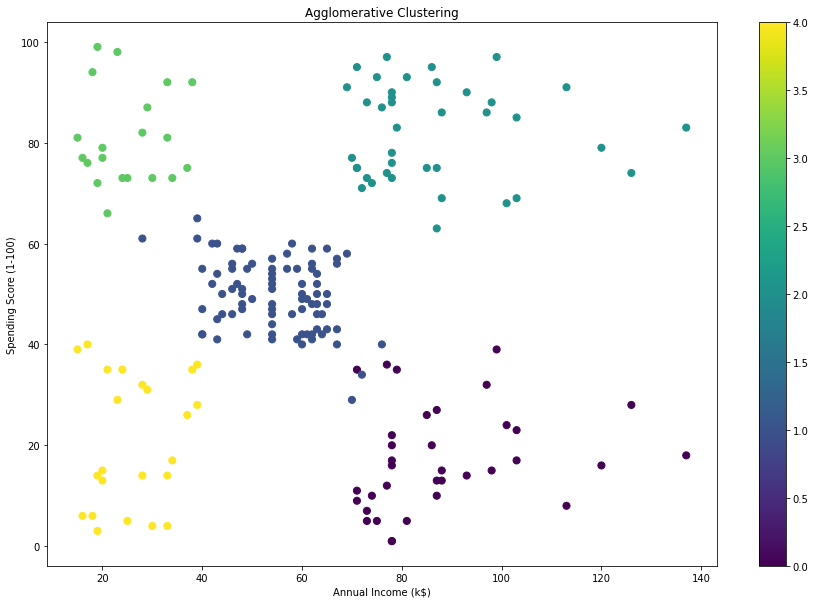

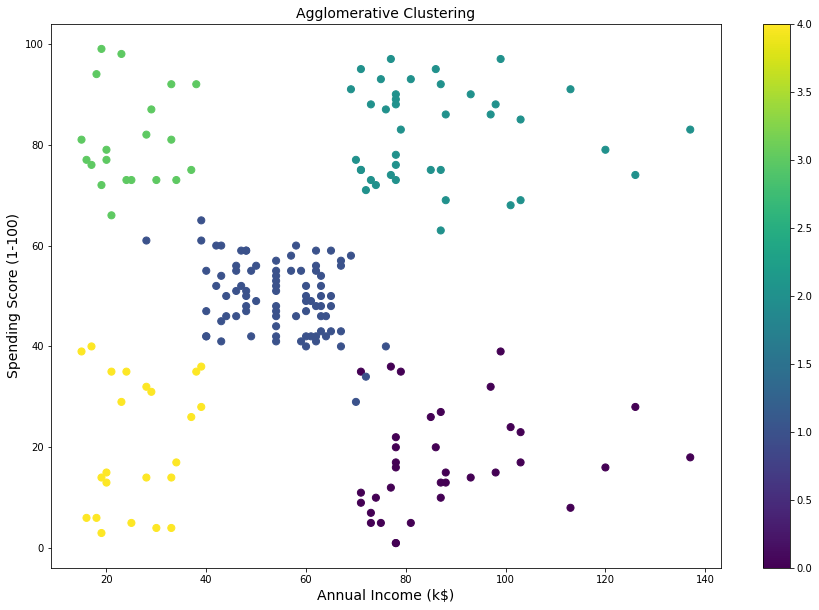

In [21]:
fig =plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['Annual Income (k$)'] , data ["Spending Score (1-100)"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering", fontsize = 14)
ax.set_xlabel("Annual Income (k$)", fontsize = 14)
ax.set_ylabel("Spending Score (1-100)", fontsize = 14)
plt.colorbar(scatter)

## Interpretation
Les clients en vert ont un petit revenu annuel mais ils ont tendance à dépenser beaucoup. Nous pouvons les appeler les clients extravagants.

Les clients en jaune ont un faible revenu et ne dépensent pas beaucoup. Nous pouvons les appeler les clients prudents.

Les clients en bleu ont un revenu moyen et des dépenses moyennes. Ce sont des clients normaux.

Les clients en bleu clair ont un revenu annuel élevé et un score de dépenses élevé. Ce sont des clients généreux.

Les clients en violet ont un revenu annuel élevé et ne dépensent pas beaucoup. Nous pouvons les appeler les clients bon march

## Dendrogram Example

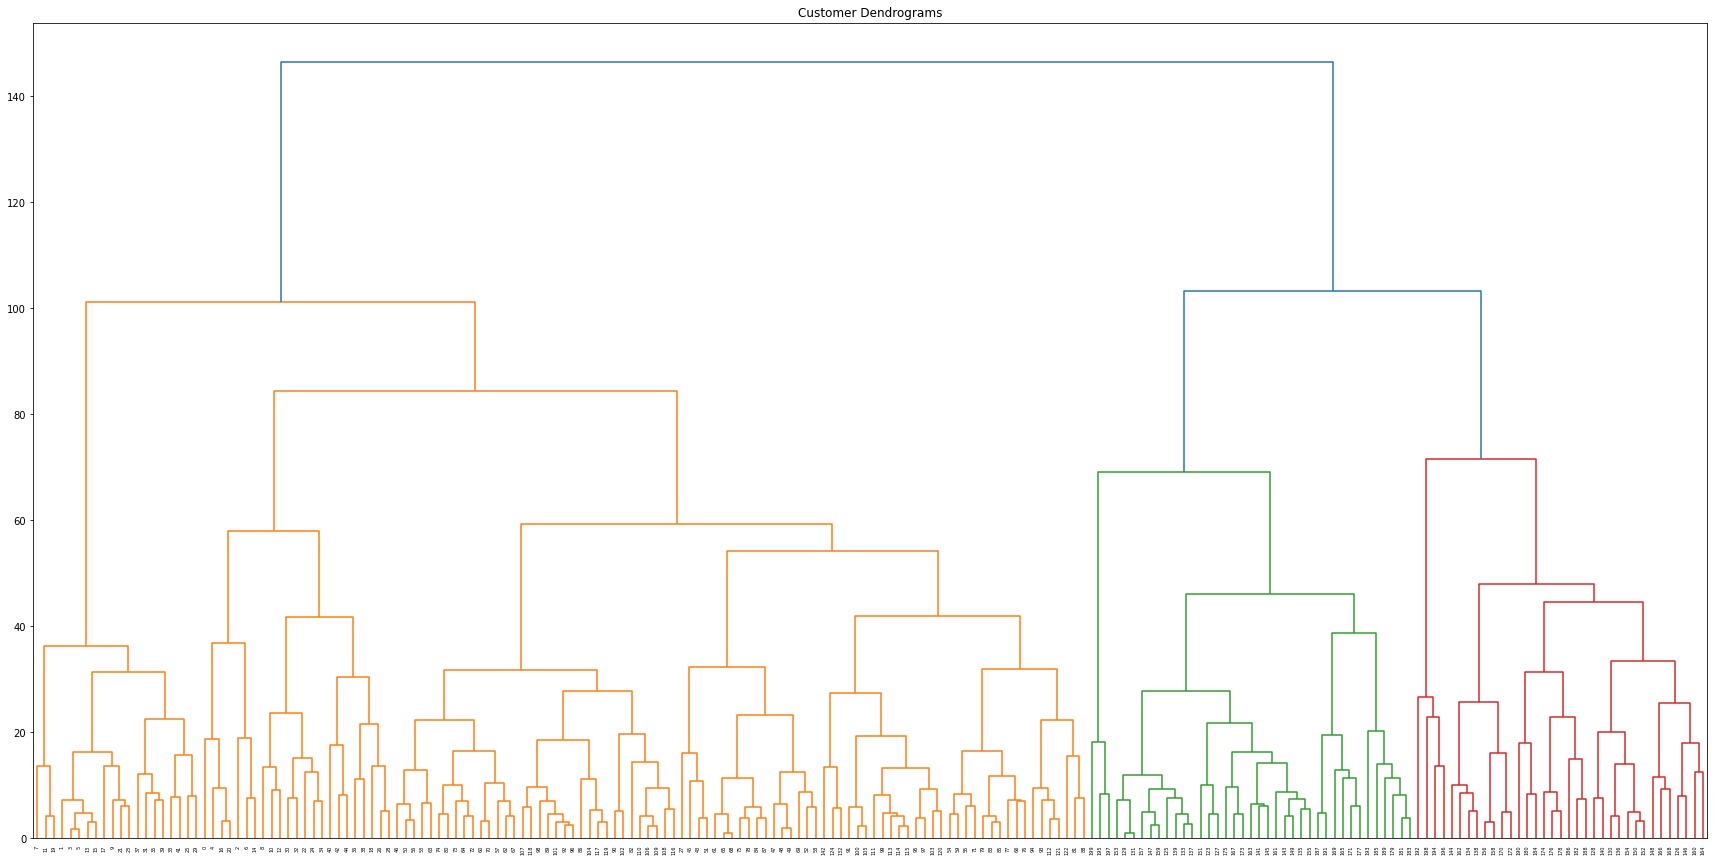

In [23]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30,15))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

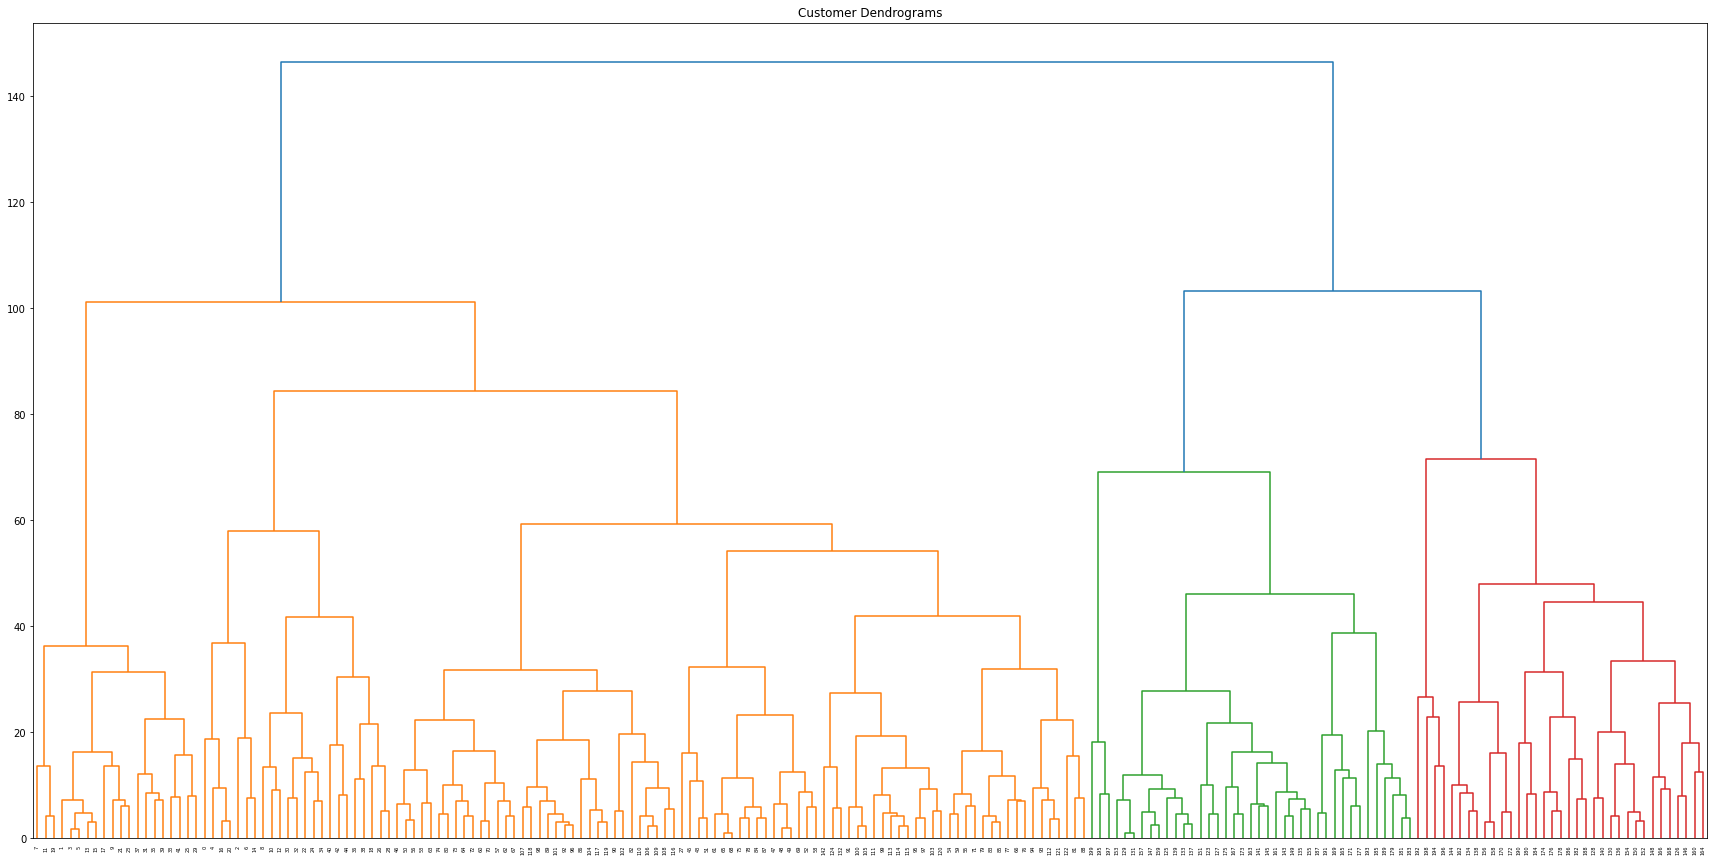

## Les étapes du clustering agglomératif sont les suivantes :

Chaque point de données est assigné à un seul cluster

Déterminer la mesure de la distance et calculer la matrice de distance.

Déterminer les linkage criteria pour fusionner les clusters.

Mettre à jour la matrice de distance

Répétez le processus jusqu'à ce que chaque point de données devienne un cluster.

# Partitional Clustering : **K-means**

In [24]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

## K-means Labels
This instruction enables us to print the label of each point in our data after the clustering is done.



In [25]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,4
2,0
3,4
4,0
...,...
195,1
196,3
197,1
198,3


## K-means Centroids

In [26]:
kmeans.predict(data)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[ 0.39130435 45.2173913  26.30434783 20.91304348]
 [ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.41772152 43.08860759 55.29113924 49.56962025]
 [ 0.52777778 40.66666667 87.75       17.58333333]
 [ 0.39130435 25.52173913 26.30434783 78.56521739]]


## K-means Plot
Each colored group represents a cluster.

In [34]:
# plt.scatter(data["Annual Income (k$)"][data.label == 0],          
#             data["Spending Score (1-100)"][labels.index == 0],s=80,c='magenta',label='Careful')
# plt.scatter(data["Annual Income (k$)"][data.label == 1],
#            data["Spending Score (1-100)"][data.label == 1],s=80,c='yellow',label='Standard')
# plt.scatter(data["Annual Income (k$)"][data.label == 2],
#            data["Spending Score (1-100)"][data.label == 2],s=80,c='green',label='Target')
# plt.scatter(data["Annual Income (k$)"][data.label == 3], 
#            data["Spending Score (1-100)"][data.label == 3],s=80,c='cyan',label='Careless')
# plt.scatter(data["Annual Income (k$)"][data.label == 4], 
#            data["Spending Score (1-100)"][data.label == 4],s=80,c='burlywood',label='Sensible')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
# plt.title('Clusters of Customers')
# plt.xlabel('Annual Income(k$)')
# plt.ylabel('Spending Score(1-100')
# plt.legend()
# plt.show()

# K-best Value

Calculating the squared distance of each point from its closest cluster.

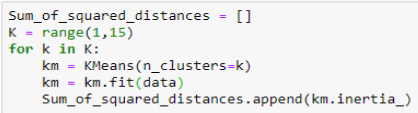

In [30]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
  k__mean = KMeans(n_clusters=k)
  k__mean = k__mean.fit(data)
  sum_of_squared_distances.append(k__mean.inertia_)
sum_of_squared_distances

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75421.38291301335,
 58348.641363315044,
 51165.18423710792,
 44391.82080487078,
 40933.10941591262,
 37290.92627943714,
 34999.37193497788,
 32031.69750765804,
 30305.45693902109,
 28630.665839438334]

## The Elbow Method Code:
The plot is like an arm, the elbow is the optimal K.

In this example, optimal K=5.

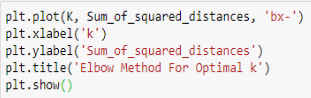

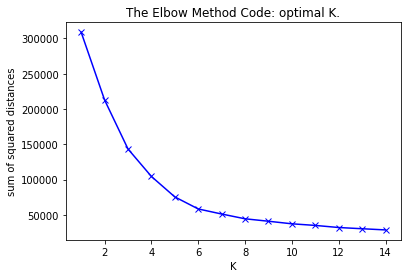

In [31]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('sum of squared distances')
plt.title('The Elbow Method Code: optimal K.')
plt.show()